# Lasso/Ridge Regression ML Model

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import math

## Using Cars93 data set to test/explore

In [2]:
df = pd.read_csv('../../data/Cars93.csv')
df_numeric = df.select_dtypes(['number'])

In [3]:
def drop_null_columns(df_name):
    for col in df_name.columns:
        if df_name[col].isnull().sum() > 0.5*(len(df_name[col])):
            print(col)
            df_name.drop(col, axis=1, inplace=True)
    return len(df_name.columns), len(df_name.columns)

def impute_values(df_name):
    for col in df_name.columns:
        if df_name[col].isnull().sum() > 0:
            try:
                df_name[col].fillna(df_name[col].mean(), inplace = True)
            except:
                df_name[col].fillna(df_name[col].mode()[0], inplace=True)

In [4]:
drop_null_columns(df_numeric)
impute_values(df_numeric)

lasso_model = Lasso(max_iter=10000)
ridge_model = Ridge()

X = df_numeric.drop('Price', axis=1)
y = df_numeric['Price']

Xt = StandardScaler().fit_transform(X)
Xt = pd.DataFrame(Xt, columns=X.columns)

results = train_test_split(Xt, y, random_state=0, test_size=0.2)
X_train, X_test, y_train, y_test = results

# Xt.describe().T.round(3)

In [5]:
parameters = {'alpha': [1e-12, 1e-9, 1e-6, 1e-3, 1, 10, 100, 1000]}


linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
mse = cross_val_score(linear_regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
mean_mse = np.mean(mse)

lasso_regressor = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor = GridSearchCV(ridge_model, parameters, scoring='neg_mean_squared_error', cv=5)

lasso_regressor.fit(X_train, y_train);
ridge_regressor.fit(X_train, y_train);

print(f' Ridge best alpha: {ridge_regressor.best_params_}\n Ridge best score: {ridge_regressor.best_score_}\n')
print(f' Lasso best alpha: {lasso_regressor.best_params_}\n Lasso best score: {lasso_regressor.best_score_}\n')
print(f' Linear best score: {mean_mse}')


 Ridge best alpha: {'alpha': 1e-12}
 Ridge best score: -0.0016084298156191334

 Lasso best alpha: {'alpha': 0.001}
 Lasso best score: -0.0011734736611818818

 Linear best score: -0.0016084298156126369


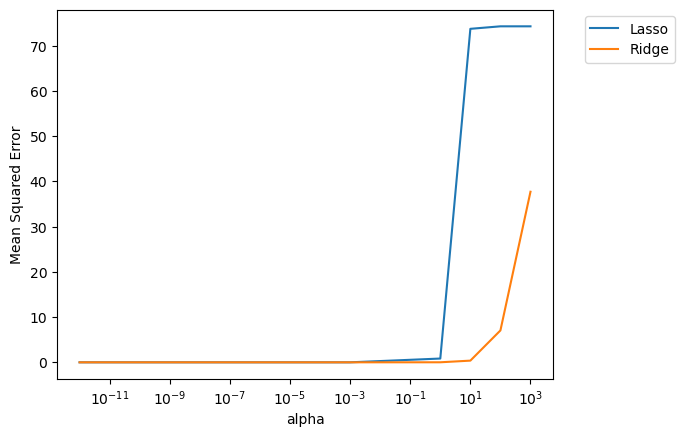

In [6]:
ridge_scores = []
lasso_scores = []
lasso_coefs = []
ridge_coefs = []
for a in parameters['alpha']:
    lasso = Lasso(alpha = a)
    lasso.fit(X_train, y_train)
    lasso_scores.append(mean_squared_error(y_test, lasso.predict(X_test)))
    lasso_coefs.append(lasso.coef_)
    
    ridge = Ridge(alpha = a)
    ridge.fit(X_train, y_train)
    ridge_scores.append(mean_squared_error(y_test, ridge.predict(X_test)))
    ridge_coefs.append(ridge.coef_)
    



plt.plot(parameters['alpha'], lasso_scores, label='Lasso');
plt.plot(parameters['alpha'], ridge_scores, label='Ridge');

plt.subplots_adjust(wspace=0.5)
plt.xscale('log');
plt.xlabel('alpha');
plt.ylabel('Mean Squared Error');
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');
plt.show()

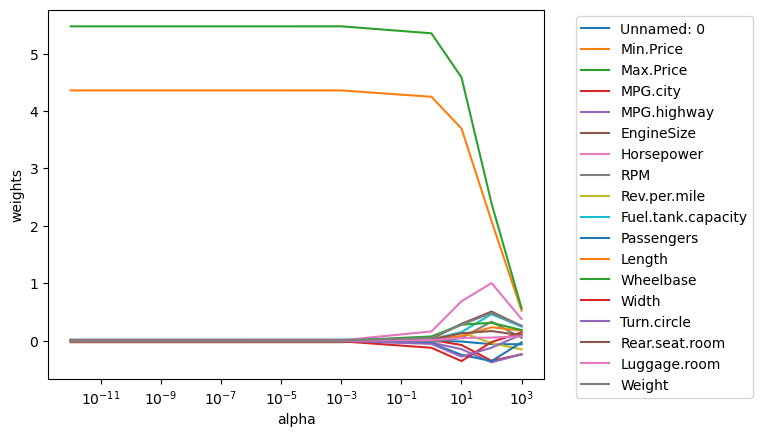

In [13]:
plt.plot(parameters['alpha'], ridge_coefs, label=X.columns)
plt.ylabel('weights');
plt.xlabel('alpha');
plt.xscale('log');
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');

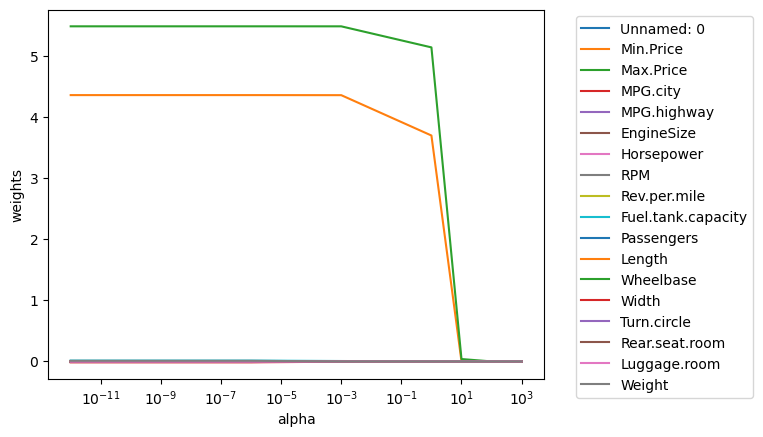

In [15]:
plt.plot(parameters['alpha'], lasso_coefs, label=X.columns)
plt.ylabel('weights');
plt.xlabel('alpha');
plt.xscale('log');
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');

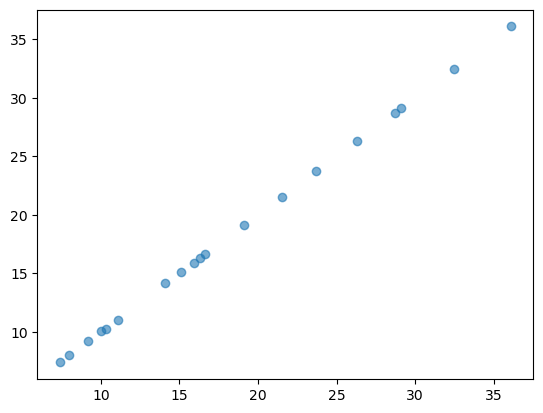

In [9]:
plt.scatter(y_test, lasso_regressor.predict(X_test), alpha=0.6)

## Dataset - Aircraft Damage

In [12]:
aircraft = pd.read_csv('../data/database.csv')

C:\Users\JesseNoss\AppData\Local\Temp\ipykernel_16796\1344273974.py:1: DtypeWarning: Columns (9,12,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  aircraft = pd.read_csv('../data/database.csv')


In [13]:
train = aircraft.select_dtypes(['number'])
train.dropna(subset=['Height'], inplace=True)
drop_null_columns(train)
impute_values(train)

Engine4 Position
Fatalities
Injuries


In [14]:
X = train.drop('Height', axis=1)
y = train['Height']

X = pd.get_dummies(X, drop_first=True)

Xt = StandardScaler().fit_transform(X)
Xt = pd.DataFrame(Xt, columns=X.columns)

In [17]:
lasso_model = Lasso(max_iter=10000)
ridge_model = Ridge()

results = train_test_split(Xt, y, test_size=0.2)
X_train, X_test, y_train, y_test = results

parameters = {'alpha': [1e-9, 1e-6, 1e-3, 1, 10, 100, 1000]}


linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
mse = cross_val_score(linear_regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
mean_mse = np.mean(mse)
lasso_regressor = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor = GridSearchCV(ridge_model, parameters, scoring='neg_mean_squared_error', cv=5)

lasso_regressor.fit(X_train, y_train);
ridge_regressor.fit(X_train, y_train);

print(f' Ridge best alpha:{ridge_regressor.best_params_}\n Ridge best score: {ridge_regressor.best_score_}\n Ridge mean error: {math.sqrt(ridge_regressor.best_score_ * -1)}\n ------\n')
print(f' Lasso best alpha: {lasso_regressor.best_params_}\n Lasso best score: {lasso_regressor.best_score_}\n Lasso mean error: {math.sqrt(ridge_regressor.best_score_ * -1)}\n ------\n')
print(f' Linear best score: {mean_mse}\n Linear mean error: {math.sqrt(mean_mse* -1)}\n Linear .score: {linear_regressor.score(X_test, y_test)}')


 Ridge best alpha:{'alpha': 100}
 Ridge best score: -1787722.7750467123
 Ridge mean error: 1337.057506260188
 ------

 Lasso best alpha: {'alpha': 1}
 Lasso best score: -1787696.5938610383
 Lasso mean error: 1337.057506260188
 ------

 Linear best score: -1787724.6993300866
 Linear mean error: 1337.0582258563336
 Linear .score: 0.41454750502541193


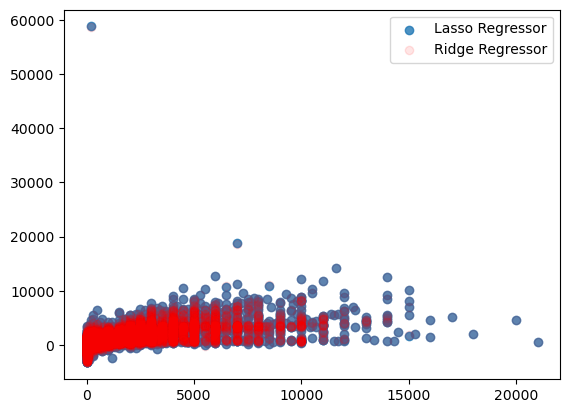

In [18]:
plt.scatter(y_test, lasso_regressor.predict(X_test), alpha=0.8, label='Lasso Regressor')
plt.scatter(y_test, ridge_regressor.predict(X_test), alpha=0.1, color='red', label='Ridge Regressor')
plt.legend()

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103677 entries, 1 to 174102
Data columns (total 41 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Record ID             103677 non-null  int64  
 1   Incident Year         103677 non-null  int64  
 2   Incident Month        103677 non-null  int64  
 3   Incident Day          103677 non-null  int64  
 4   Aircraft Mass         103677 non-null  float64
 5   Engine Make           103677 non-null  float64
 6   Engines               103677 non-null  float64
 7   Engine2 Position      103677 non-null  float64
 8   Height                103677 non-null  float64
 9   Speed                 103677 non-null  float64
 10  Distance              103677 non-null  float64
 11  Aircraft Damage       103677 non-null  int64  
 12  Radome Strike         103677 non-null  int64  
 13  Radome Damage         103677 non-null  int64  
 14  Windshield Strike     103677 non-null  int64  
 15  

## Dataset - Diamonds

In [16]:
diamonds = pd.read_csv('../data/diamonds.csv')
# diamonds_df.info()
# diamonds = diamonds_df.head(5000)

In [17]:
# diamonds_expanded.info()

def append_random_data(dataframe):
    rows = dataframe.shape[0]
    cols = dataframe.shape[1] * 3
    col_list = ['s' + str(x) for x in range(1, cols + 1)]
    random_dataframe = pd.DataFrame(np.random.randint(0, 1000000, size=(rows, cols)), columns=col_list)
    # random_dataframe = pd.DataFrame(np.zeros([rows, cols]), columns=col_list)
    expanded_df = pd.concat([dataframe, random_dataframe], axis=1)
    return expanded_df

In [18]:
expanded_df = append_random_data(diamonds)


X = expanded_df.drop(['Unnamed: 0', 'price'], axis=1)
y = expanded_df[['price']]
X = pd.get_dummies(X, drop_first=True)

Xt = StandardScaler().fit_transform(X)
Xt = pd.DataFrame(Xt, columns=X.columns)

In [19]:
yt = StandardScaler().fit_transform(y)
yt = pd.DataFrame(yt, columns=y.columns)

In [20]:
lasso_model = Lasso(max_iter=100000)
ridge_model = Ridge(max_iter=100000)

results = train_test_split(Xt, y, random_state=0, test_size=0.2)
X_train, X_test, y_train, y_test = results

parameters = {'alpha': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10, 100]}

scoring = {'R2': 'r2', 'mse': 'neg_mean_squared_error'}

lasso_regressor = GridSearchCV(lasso_model, parameters, scoring=scoring, cv=6, refit='mse')
ridge_regressor = GridSearchCV(ridge_model, parameters, scoring=scoring, cv=6, refit='mse')

lasso_regressor.fit(X_train, y_train);
ridge_regressor.fit(X_train, y_train);


linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
mse = cross_val_score(linear_regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=6)
mean_mse = np.mean(mse)


def get_mean_error(regressor):
    mean_error = math.sqrt(regressor.best_score_ * -1)
    return mean_error


print(f' Lasso best alpha: {lasso_regressor.best_params_}\n Lasso best score (-mse): {lasso_regressor.best_score_}\n Lasso mean error: {get_mean_error(lasso_regressor)}\n ------')
print(f' Ridge best alpha: {ridge_regressor.best_params_}\n Ridge best score (-mse): {ridge_regressor.best_score_}\n Ridge mean error: {get_mean_error(ridge_regressor)}\n ------')
print(f' Linear best score (-mse): {mean_mse}\n Linear mean error: {math.sqrt(mean_mse* -1)}\n Linear r2: {linear_regressor.score(X_test, y_test)}\n')

print(f" Largest price: ${y['price'].nlargest(1).to_string(index=False)}\n Mean price: ${round(sum(y['price'])/(len(y)), 3)}\n Smallest price: ${y['price'].nsmallest(1).to_string(index=False)}")

 Lasso best alpha: {'alpha': 1}
 Lasso best score (-mse): -1288332.1013924044
 Lasso mean error: 1135.0471802495279
 ------
 Ridge best alpha: {'alpha': 10}
 Ridge best score (-mse): -1289355.3147223752
 Ridge mean error: 1135.4978268241534
 ------
 Linear best score (-mse): -1289497.494557779
 Linear mean error: 1135.5604319267993
 Linear r2: 0.921242276277683

 Largest price: $18823
 Mean price: $3932.8
 Smallest price: $326


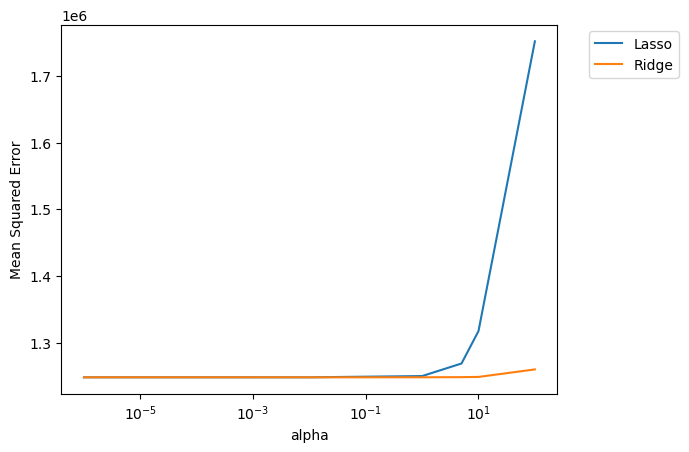

In [21]:
ridge_scores = []
lasso_scores = []
lasso_coefs = []
ridge_coefs = []
for a in parameters['alpha']:
    lasso = Lasso(alpha = a, max_iter=100000)
    lasso.fit(X_train, y_train)
    lasso_scores.append(mean_squared_error(y_test, lasso.predict(X_test)))
    lasso_coefs.append(lasso.coef_)
    
    ridge = Ridge(alpha = a, max_iter=100000)
    ridge.fit(X_train, y_train)
    ridge_scores.append(mean_squared_error(y_test, ridge.predict(X_test)))
    ridge_coefs.append(ridge.coef_[0])
    



plt.plot(parameters['alpha'], lasso_scores, label='Lasso');
plt.plot(parameters['alpha'], ridge_scores, label='Ridge');

plt.subplots_adjust(wspace=0.5)
plt.xscale('log');
plt.xlabel('alpha');
plt.ylabel('Mean Squared Error');
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');
plt.show()

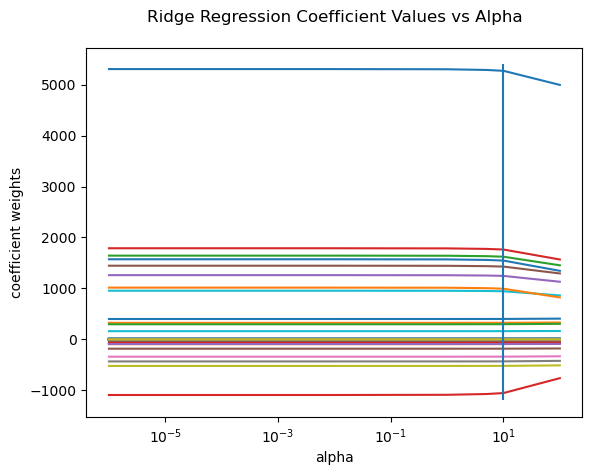

In [22]:
plt.plot(parameters['alpha'], ridge_coefs, label=X.columns)
plt.vlines(x = 10, ymin=-1200, ymax=5400 )

plt.ylabel('coefficient weights');
plt.xlabel('alpha');
plt.xscale('log');
plt.title('Ridge Regression Coefficient Values vs Alpha\n');
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');

Text(0.5, 1.0, 'Lasso Regression Coefficient Values vs Alpha\n')

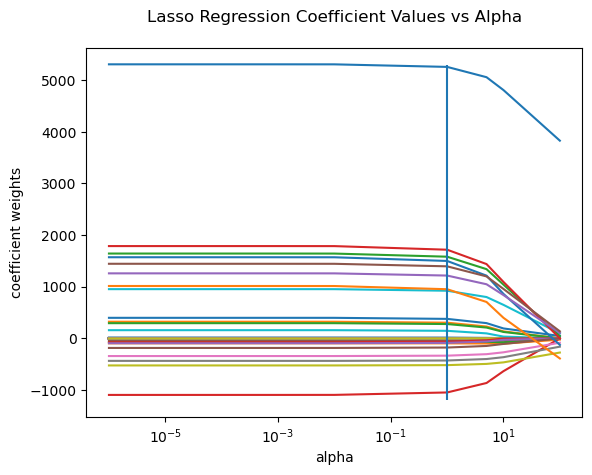

In [23]:
plt.plot(parameters['alpha'], lasso_coefs, label=X.columns)
plt.vlines(x = 1, ymin = -1200, ymax = 5300)
plt.ylabel('coefficient weights');
plt.xlabel('alpha');
plt.xscale('log');
plt.title('Lasso Regression Coefficient Values vs Alpha\n')

# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');

In [24]:
lasso_m = Lasso(alpha= 1, max_iter=100000)
ridge_m = Ridge(alpha = 10, max_iter=100000)

lasso_m.fit(X_train, y_train)
ridge_m.fit(X_train, y_train)


lasso_coef = []
ridge_coef = []
for i in lasso_m.coef_:
    if abs(i) > 0:
        lasso_coef.append(i)
for i in ridge_m.coef_[0]:
    if abs(i) > 0:
        ridge_coef.append(i)

print(f" Coefficients > 0 in ridge regression: {len(ridge_coef)}\n Coefficients > 0 in lasso regression: {len(lasso_coef)}")
# list(zip(ridge_m.feature_names_in_, ridge_m.coef_[0]));

 Coefficients > 0 in ridge regression: 56
 Coefficients > 0 in lasso regression: 49


0.10801591570415835

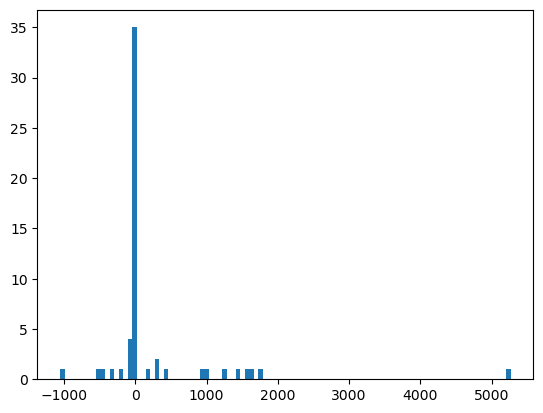

In [25]:
plt.hist(ridge_m.coef_[0], bins=100);
abs(ridge_m.coef_[0]).min()

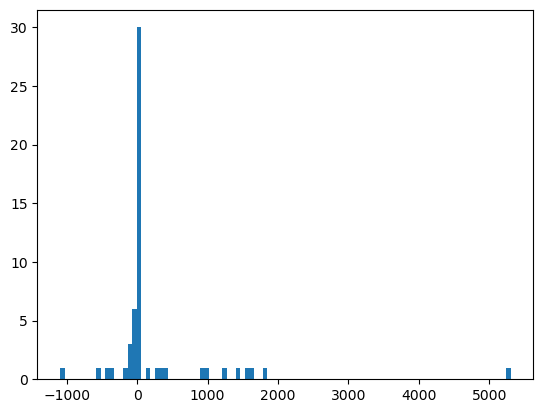

In [26]:
plt.hist(linear_regressor.coef_[0], bins=100);

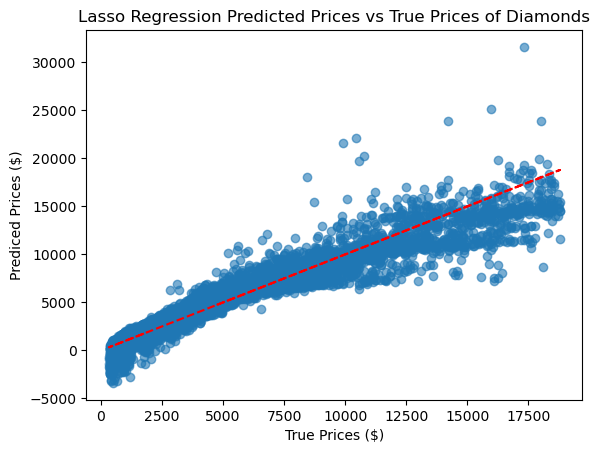

In [27]:
plt.scatter(y_test, lasso_regressor.predict(X_test), alpha=0.6);
plt.plot(y_test, y_test, 'r--');
plt.xlabel('True Prices ($)');
plt.ylabel('Prediced Prices ($)');
plt.title('Lasso Regression Predicted Prices vs True Prices of Diamonds');

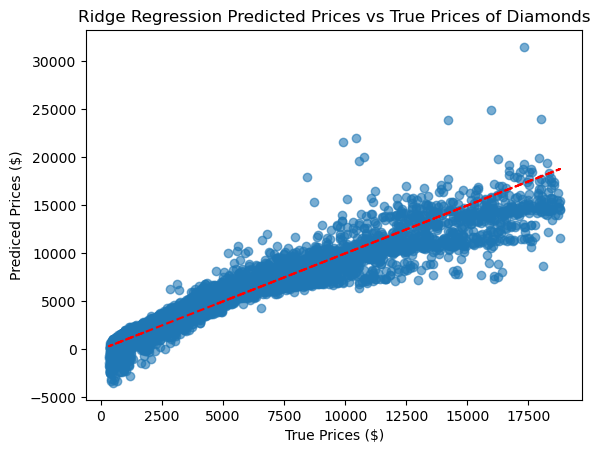

In [28]:
plt.scatter(y_test, ridge_regressor.predict(X_test), alpha=0.6)
plt.plot(y_test, y_test, 'r--')
plt.xlabel('True Prices ($)');
plt.ylabel('Prediced Prices ($)');
plt.title('Ridge Regression Predicted Prices vs True Prices of Diamonds');